In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nu = 10
ss = 4
x = 8

In [3]:
def gaus(x,nu,ss):
    
    pre = 1/(np.sqrt(2*np.pi*ss))
    return pre*np.exp(-0.5*(x-nu)**2/ss)

In [4]:
gaus(x,nu,ss)

0.12098536225957168

In [10]:
x = np.linspace(0,20)
y = gaus(x,nu,ss)

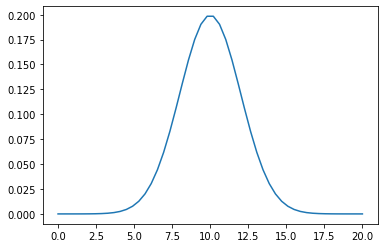

In [11]:
plt.plot(x,y)

In [12]:
3*0.04+2*0.12

0.36

In [13]:
0.04/.36

0.11111111111111112

In [14]:
0.12/.36

0.3333333333333333

In [ ]:


p=[0.2,0.2,0.2,0.2,0.2]
pHit = 0.6
pMiss = 0.2

#Enter code here
hits = [1,2]
pup = []

for i in range(len(p)):
    
    if i in hits:
        pup.append(p[i]*pHit)
    else:
        pup.append(p[i]*pMiss)
        
# norm = 0

# for i in range(len(pup)):
#     norm += pup[i]
    
# for i in range(len(pup)):
#     pup[i] = pup[i]/norm

In [10]:
lst = [1,0,0,1,0]

In [28]:
lst

[1, 0, 0, 1, 0]

In [11]:
lst[:] = [lst[-1]] + lst[:-1]

In [30]:
lst

[0, 1, 0, 0, 1]

In [1]:
0.01+0.01+0.16+0.16+0.72

1.06

In [2]:
0.8*0.8

0.6400000000000001

In [3]:
0.8*0.1

0.08000000000000002

In [5]:
0.64+0.08+0.08

0.7999999999999999

In [6]:
0.9+0.01+0.01+0.16+0.16

1.24

In [7]:
ps = [0.01,0.01,0.16,0.8,0.16]

In [8]:
for i in range(len(ps)):
    ps[i] = ps[i]/1.24

In [9]:
ps

[0.008064516129032258,
 0.008064516129032258,
 0.12903225806451613,
 0.6451612903225807,
 0.12903225806451613]

In [24]:
lst = [0,0.5,0,0.5,0]

In [27]:
# this moves one to the right, rinse and repeats
lst[:] = [lst[-1]] + lst[:-1]

In [28]:
lst3 = np.array(lst)*0.1

In [19]:
lst1

array([0.4, 0. , 0. , 0.4, 0. ])

In [23]:
lst2

array([0.  , 0.  , 0.05, 0.  , 0.05])

In [29]:
lst3

array([0.  , 0.05, 0.  , 0.  , 0.05])

In [30]:
final = lst1 + lst2 + lst3

In [31]:
final

array([0.4 , 0.05, 0.05, 0.4 , 0.1 ])

In [32]:
lst = [0.2,0.2,0.2,0.2,0.2]
# this moves one to the right, rinse and repeats
lst[:] = [lst[-1]] + lst[:-1]

In [33]:
lst[:] = [lst[-1]] + lst[:-1]

In [34]:
lst

[0.2, 0.2, 0.2, 0.2, 0.2]

In [1]:
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.
from copy import deepcopy
import numpy as np

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    
    q=[]
    qcor = deepcopy(p)
    qund = deepcopy(p)
    qovr = deepcopy(p)
    
    qcor = np.array(qcor[-U:] + qcor[:-U])*pExact
    qund = np.array(qund[-(U-1):] + qund[:-(U-1)])*pUndershoot
    qovr = np.array(qovr[-(U+1):] + qovr[:-(U+1)])*pOvershoot
    
    q[:] = qcor+qund+qovr
        
    return q
    

print(move(p, 2))

[0.0, 0.0, 0.1, 0.8, 0.1]


In [44]:
from copy import deepcopy

In [47]:
q = deepcopy(p)

In [54]:
U = 2
qcor = deepcopy(p)
qund = deepcopy(p)
qovr = deepcopy(p)

qcor = np.array(qcor[-U:] + qcor[:-U])*pExact
qund = np.array(qund[-(U-1):] + qund[:-(U-1)])*pUndershoot
qovr = np.array(qovr[-(U+1):] + qovr[:-(U+1)])*pOvershoot

In [55]:
qcor

array([0. , 0. , 0. , 0.8, 0. ])

In [4]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'red']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
#
# ADD CODE HERE
#

for i in range(2):
    p = sense(p, measurements[i])
    p = move(p, motions[i])
    
print(p)

[0.07882352941176471, 0.07529411764705884, 0.22470588235294123, 0.4329411764705882, 0.18823529411764706]


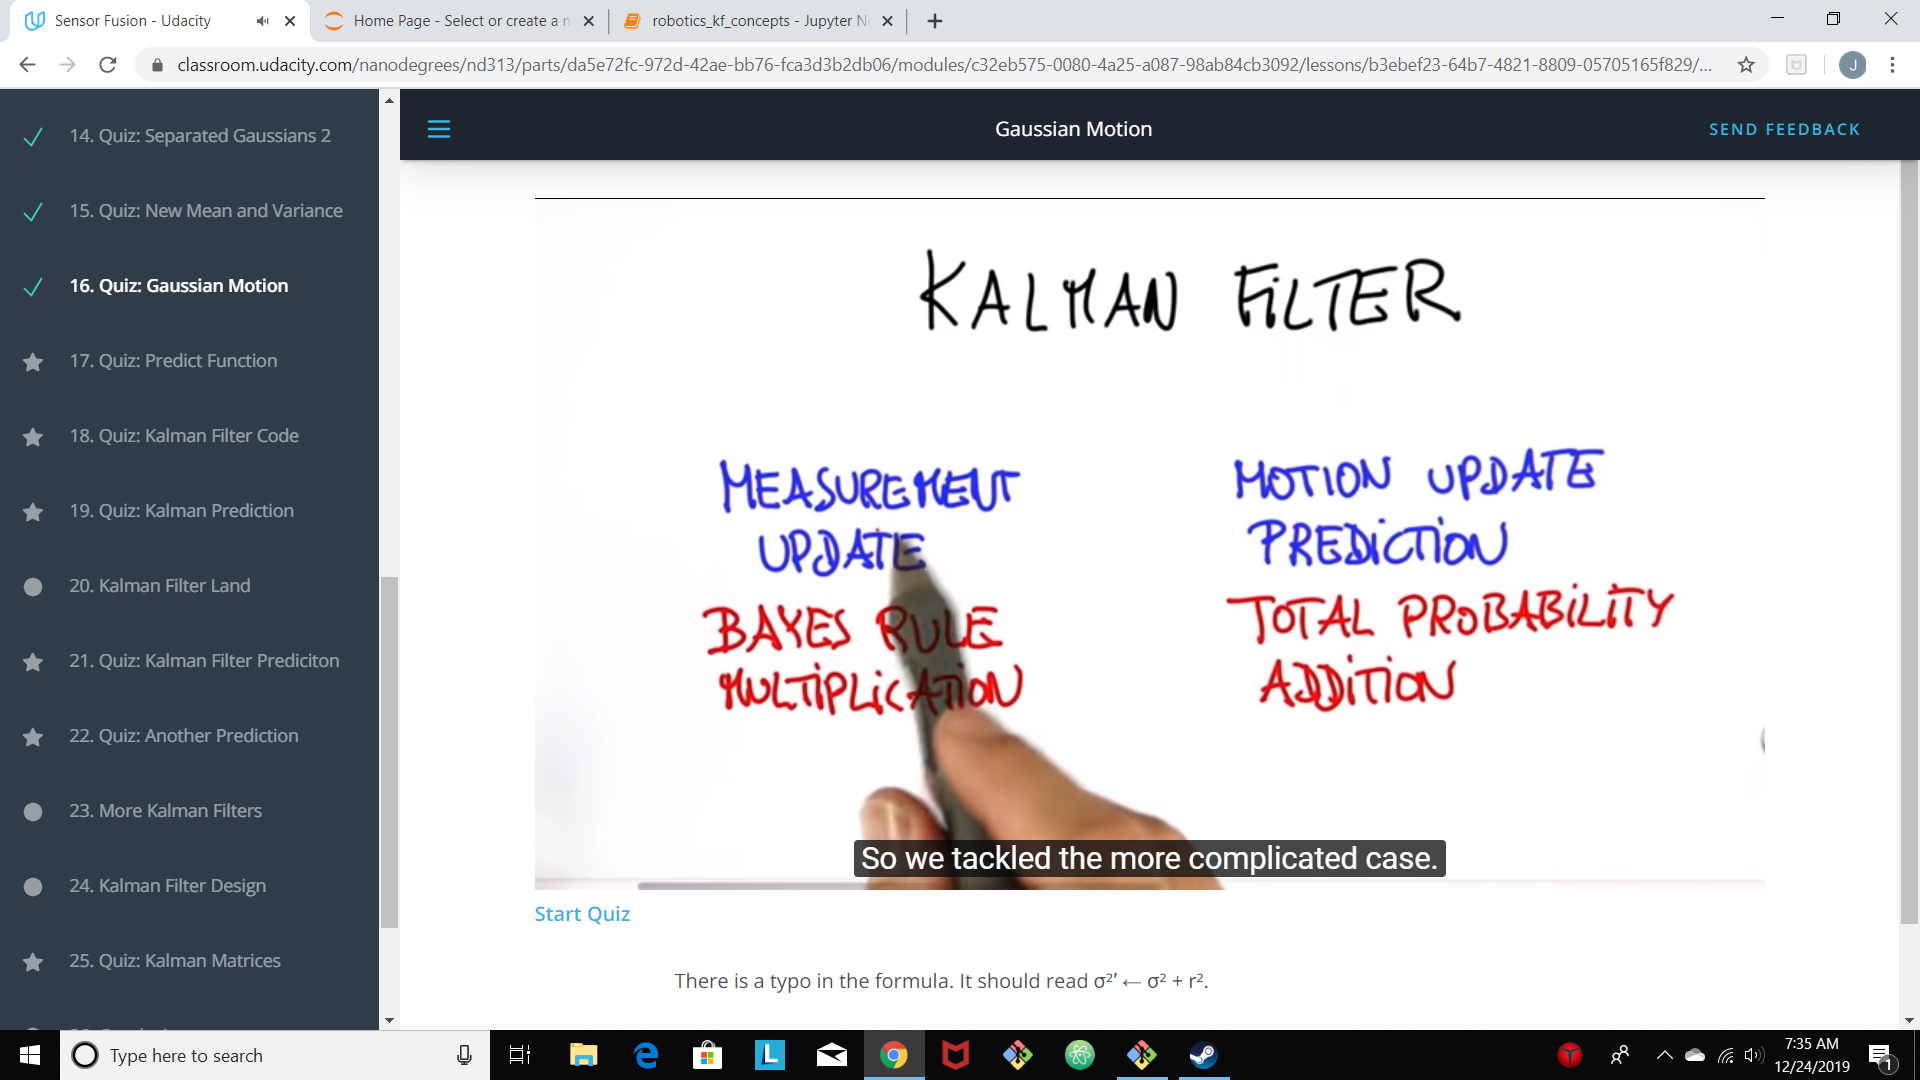

## Measurement Update

### Measurements gain information, and the new variance is better than either

$\mu \space and \space \nu$ are the prior and measurement means

$\sigma^2 \space and \space r^2$ are the prior and measurement variances

$\mu' = (r^2*\mu + \sigma^2*\nu)/(\sigma^2 + r^2)$

$\sigma^2$' = 1/(1/$\sigma^2$ + $1/r^2$)

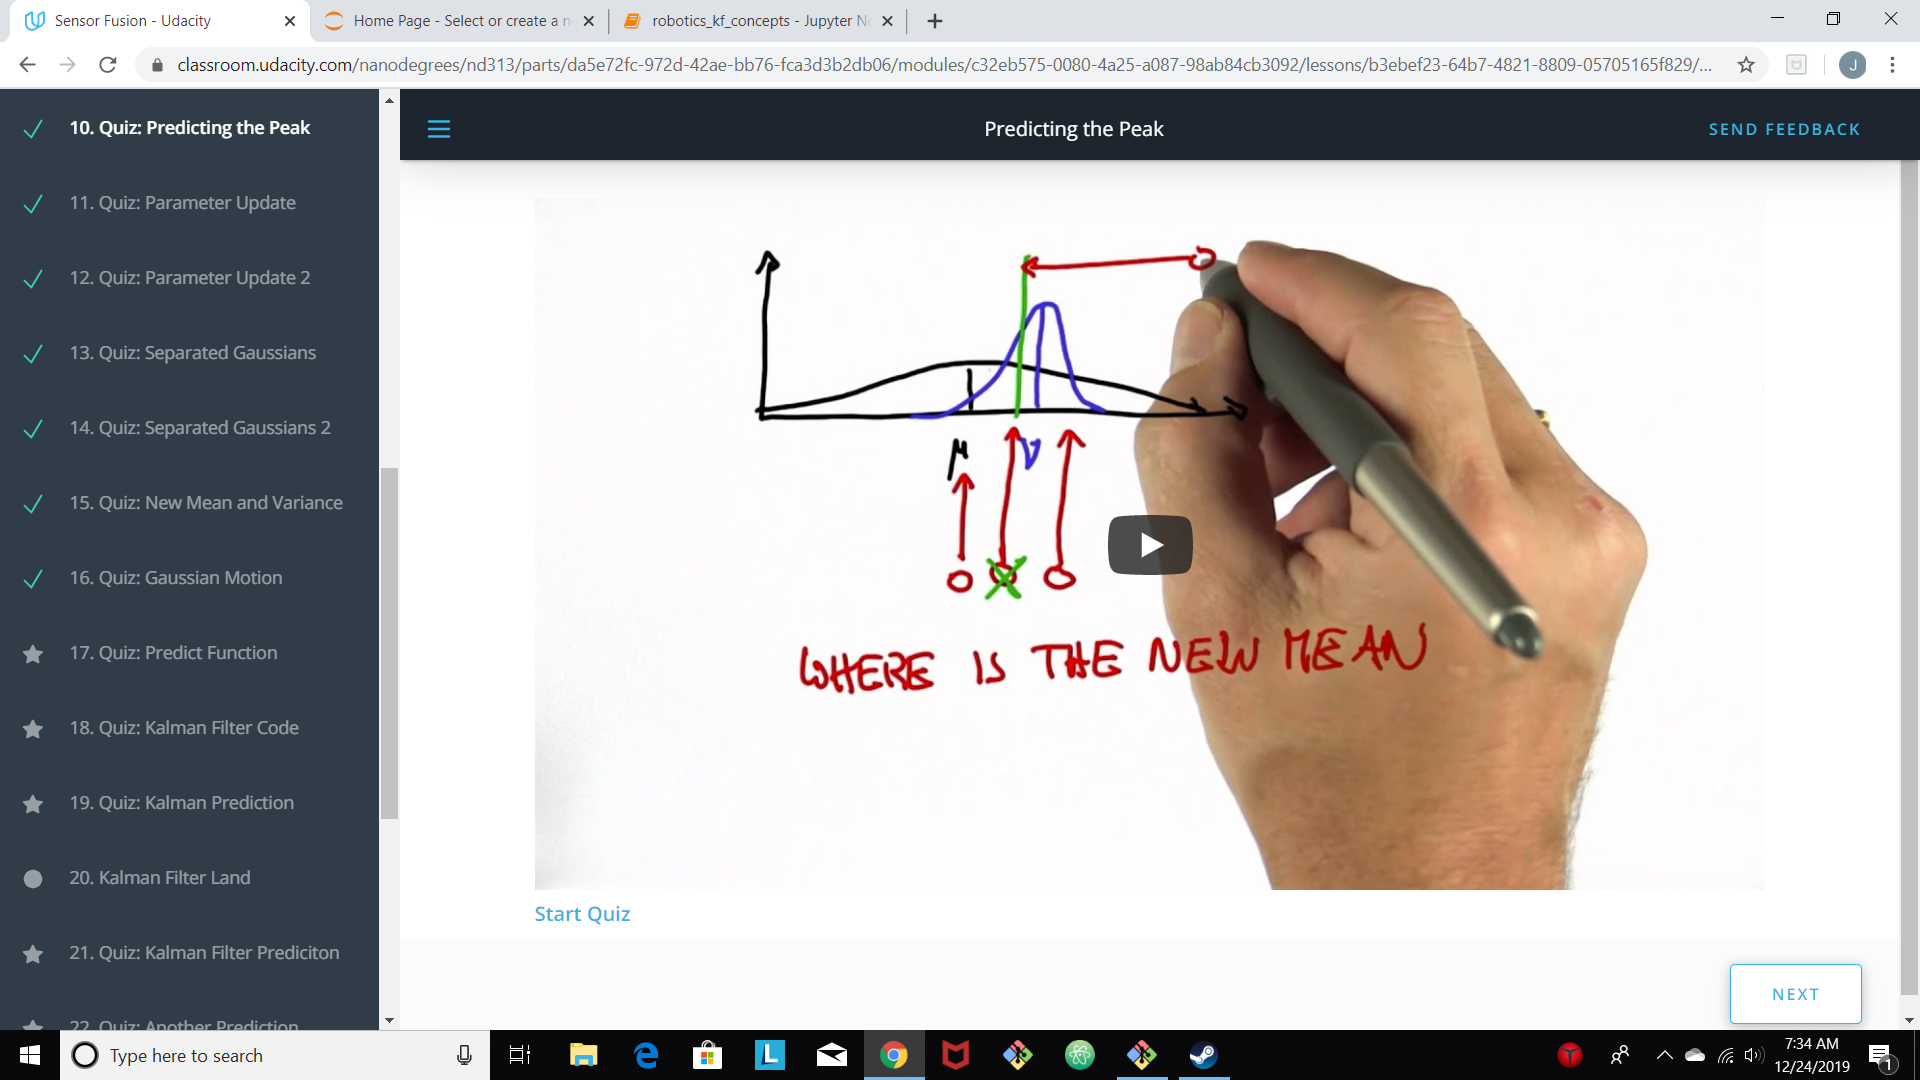

In [1]:
def measurement(mu,nu,sig,r):
    mun = (r*mu + sig*nu)/(sig + r)
    nsig = 1/(1/sig+1/r)
    
    return mun,nsig

In [4]:
measurement(10,13,8,2)

(12.4, 1.6)

In [5]:
def update(mean1, var1, mean2, var2):
    
    new_mean = (var2*mean1 + var1*mean2)/(var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return [new_mean, new_var]

print(update(10.,8.,13., 2.))

[12.4, 1.6]


## Motion Update

### Movements lose information, since both the motion has its own uncertainty which adds to prior

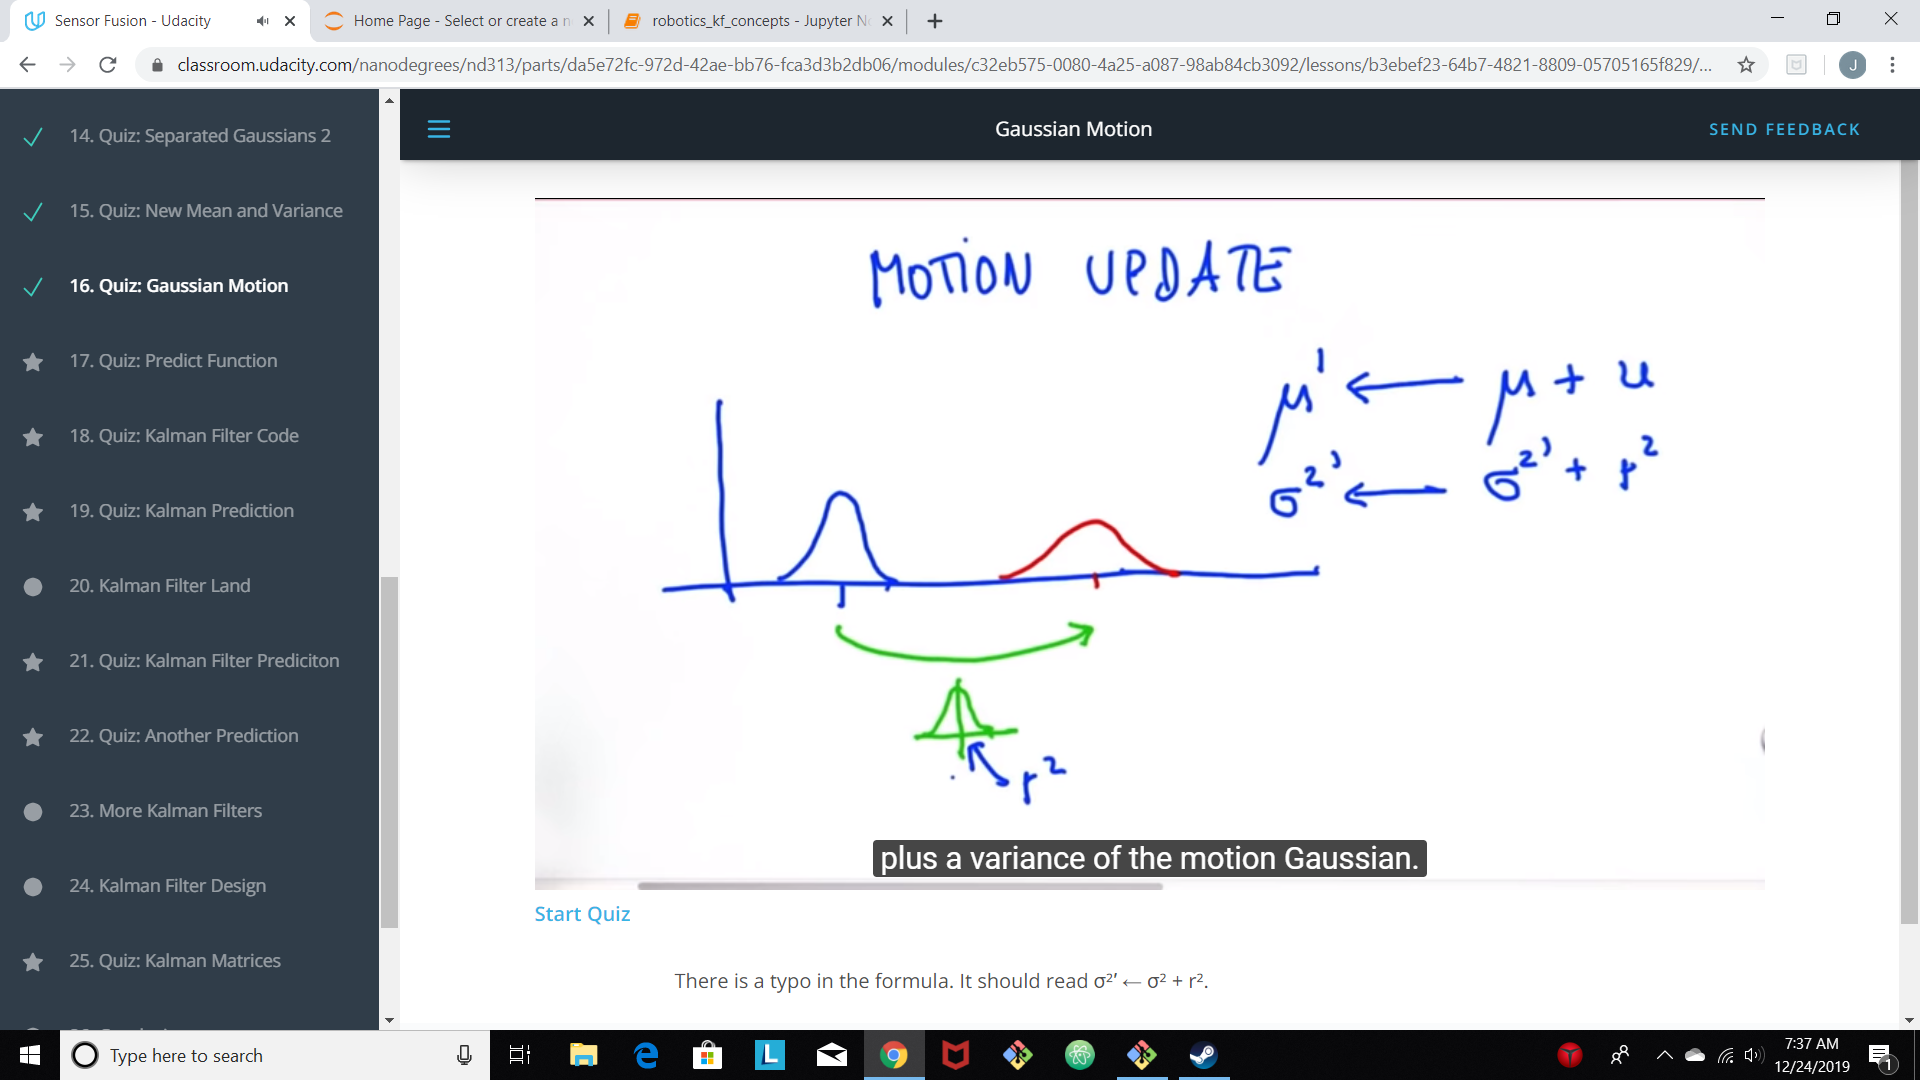

In [7]:
# Write a program that will predict your new mean
# and variance given the mean and variance of your 
# prior belief and the mean and variance of your 
# motion. 

def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

print(predict(10., 4., 12., 4.))

[22.0, 8.0]


In [9]:
# Write a program that will iteratively update and
# predict based on the location measurements 
# and inferred motions shown below. 

def update(mean1, var1, mean2, var2):
    new_mean = float(var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1./(1./var1 + 1./var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

for i in range(len(measurements)):
    mu, sig = update(mu, sig, measurements[i],measurement_sig)
    mu, sig = predict(mu, sig, motion[i], motion_sig)

#Please print out ONLY the final values of the mean
#and the variance in a list [mu, sig]. 

# Insert code here

print( [mu, sig] )


[10.999906177177365, 4.005861580844194]


## 2D Kalman Filters

The core power of a Kalman filter is its ability to build information between two variables correlated by some know physical model, using only observations of one of them. This is shown below for the relation between position and velocity, based on measurements of only position.

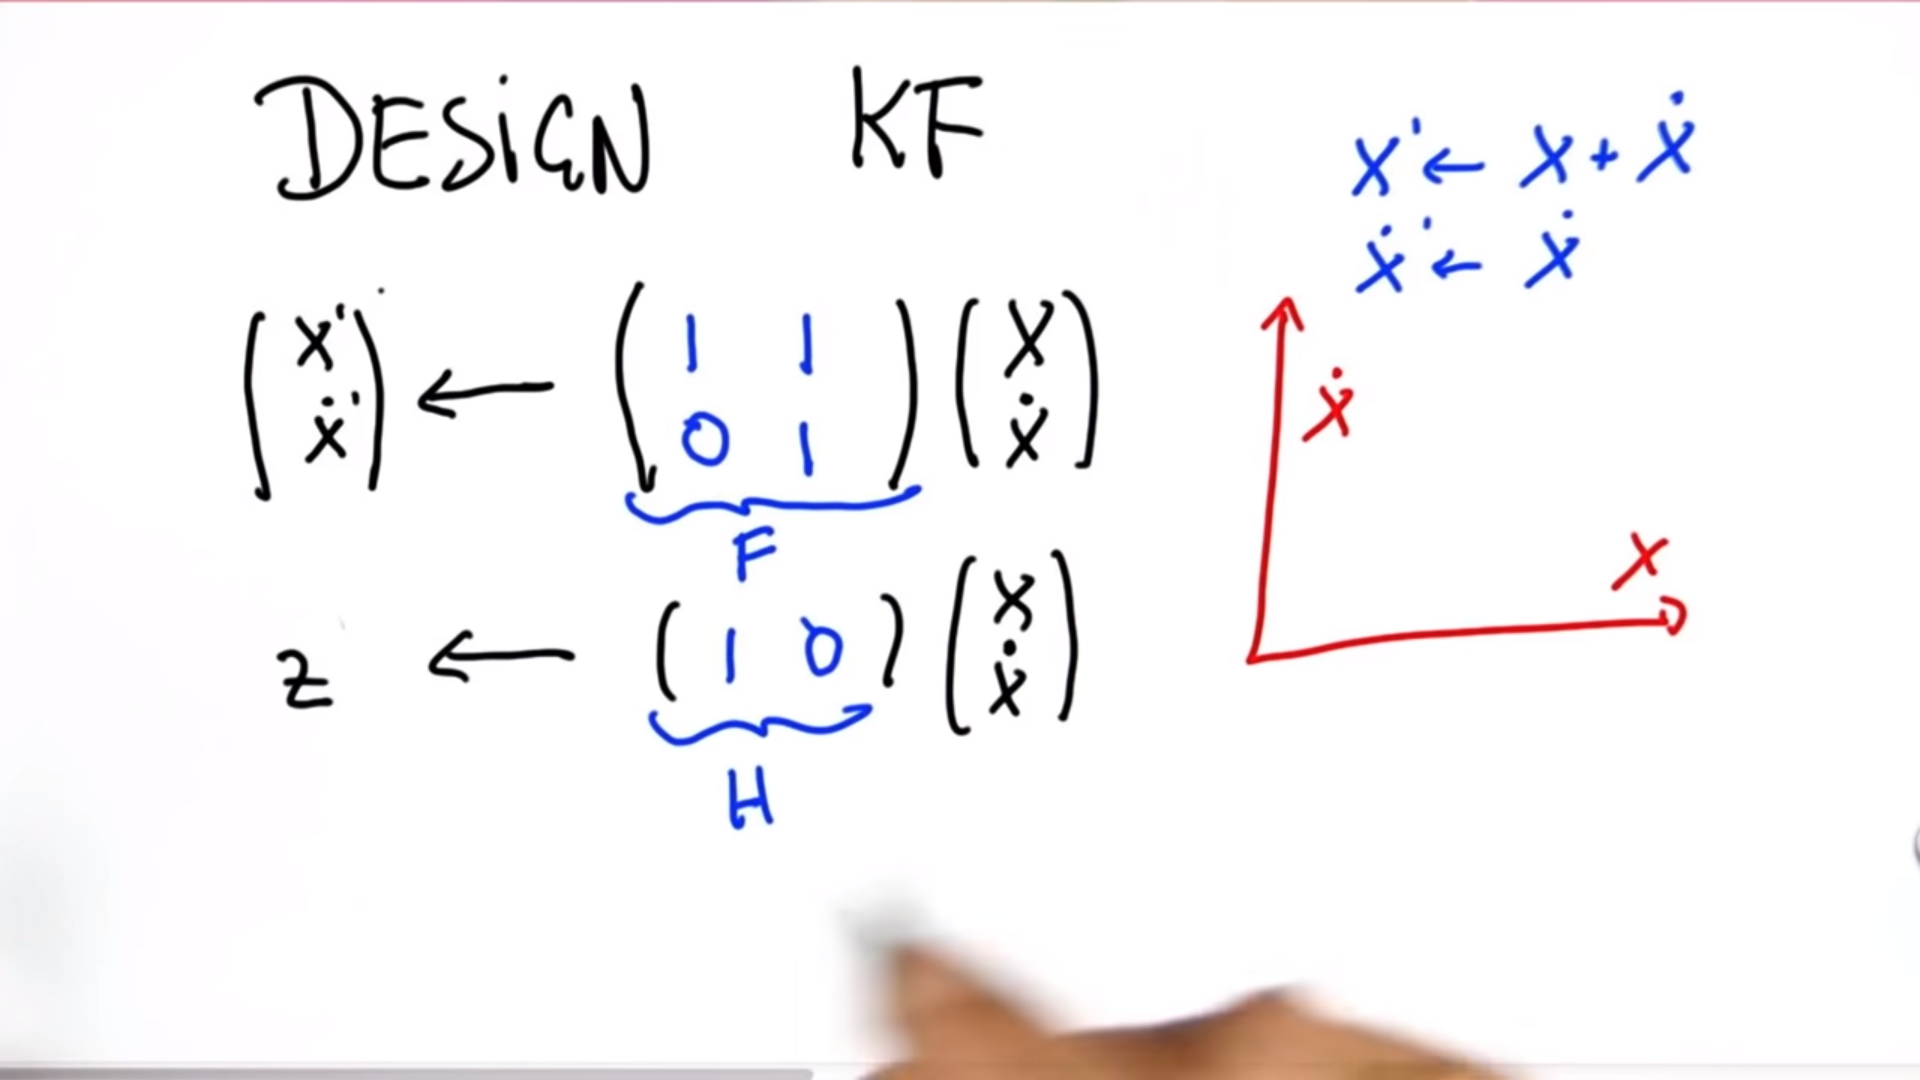
